# Titanic Competetion


In [474]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) - R > all


import warnings ##To remove warnings
warnings.filterwarnings('ignore')

In [475]:
import os
print(os.listdir("input"))

['gender_submission.csv', 'test.csv', 'train.csv']


In [476]:
#importing the training and test data sets
dataset = pd.read_csv('input/train.csv')
df_train = pd.read_csv('input/train.csv')
df_test = pd.read_csv('input/test.csv')

In [477]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [478]:
df_train.shape

(891, 12)

In [479]:
#let's summarize the dataset
#we can see the we have some missing values in the "Age" column
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [480]:
df_test.shape

(418, 11)

In [481]:
test_ID = df_test['PassengerId']

In [482]:
#delete the id column from datasets
del df_train['PassengerId']
del df_test['PassengerId']

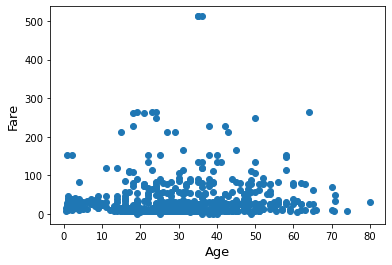

In [483]:
#exploring outliers
#we can't find any outlier in the countinous columns 
fig, ax = plt.subplots()
ax.scatter(x = df_train['Age'], y = df_train['Fare'])
plt.ylabel('Fare', fontsize=13)
plt.xlabel('Age', fontsize=13)
plt.show()

In [484]:
df_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# Handling Missing Data

In [485]:
## https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html

## fill missing age values usiing the median
df_train["Age"] = df_train["Age"].fillna(df_train["Age"].median())
df_test["Age"] = df_test["Age"].fillna(df_train["Age"].median())

## As we've seen before, "Cabin" has too many NAs. Let's drops this col then
df_train = df_train.drop(columns="Cabin")
df_test = df_test.drop(columns="Cabin")

## At last, we drop the rows whereupon "Embarked" is NA 
df_train.dropna()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [486]:
# we're gonna use only the surname for this analysis
df_train["Surname"] = df_train.Name.str.split(",").str[0]
df_test["Surname"] = df_test.Name.str.split(",").str[0]

df_train = df_train.drop(columns = "Name")
df_test = df_test.drop(columns = "Name")



In [487]:
df_test.shape

(418, 9)

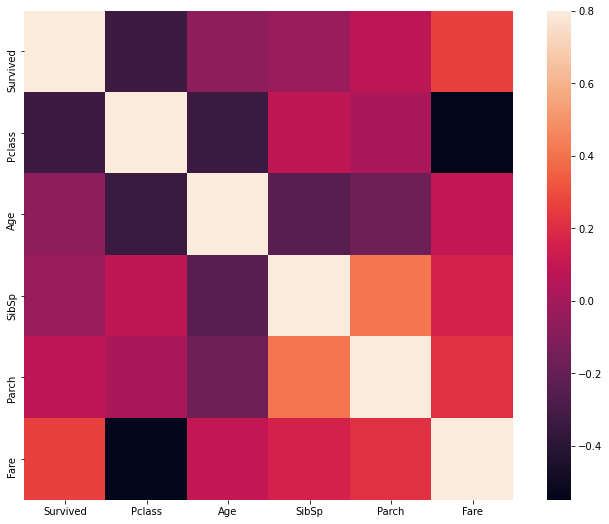

In [488]:
import seaborn as sns
#correlation matrix
# Here we can see that "Survived" and "Pclass" has a negativy correlation
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [489]:
#.sort_values(by=['surname_count'], ascending = [False])
#calcular a taxa de sobreviventes por nome de familia 


In [490]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
Surname      object
dtype: object

In [491]:
def ticket_type(ticket):
    if ticket.isnumeric():
        return "normal"
    else:
        return ticket.split()[0]

#df_train["Ticket"].unique()


In [492]:
df_train["Ticket"] = df_train["Ticket"].map(ticket_type) ##using map because it's a series
df_test["Ticket"] = df_test["Ticket"].map(ticket_type)

# Analysis

In [493]:
X = df_train.iloc[:, 1:]
y = df_train.iloc[:, 0]

In [494]:
##Enconding categorical Data
categorical_cols = ["Sex", "Ticket", "Embarked", "Surname"]
X = pd.get_dummies(X, columns=categorical_cols)


In [495]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [496]:
X_train.loc[:, ["Age", "Fare"]]

,Age,Fare
301,28.0,23.2500
309,30.0,56.9292
516,34.0,10.5000
120,21.0,73.5000
570,62.0,10.5000
...,...,...
715,19.0,7.6500
767,30.5,7.7500
72,21.0,73.5000
235,28.0,7.5500


In [497]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train.loc[:, ["Age", "Fare"]] = scaler.fit_transform(X_train.loc[:, ["Age", "Fare"]])
X_test.loc[:, ["Age", "Fare"]] = scaler.transform(X_test.loc[:, ["Age", "Fare"]])

# Model Selection

In [498]:
from sklearn.metrics import confusion_matrix, accuracy_score


In [506]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)

# Making the Confusion Matrix
y_pred = rf_classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

[[102   4]
 [ 31  42]]


0.8044692737430168

In [507]:
# Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)
dt_classifier.fit(X_train, y_train)

# Making the Confusion Matrix
y_pred = dt_classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

[[93 13]
 [23 50]]


0.7988826815642458

In [518]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)

# Making the Confusion Matrix
y_pred = knn_classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

[[96 10]
 [28 45]]


0.7877094972067039

In [519]:
# Training the Kernel SVM model on the Training set
from sklearn.svm import SVC
ksvm_classifier = SVC(kernel = 'rbf', random_state = 0)
ksvm_classifier.fit(X_train, y_train)

# Making the Confusion Matrix
y_pred = ksvm_classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

[[95 11]
 [25 48]]


0.7988826815642458

In [526]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

# Making the Confusion Matrix
y_pred = lr_classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

[[90 16]
 [23 50]]


0.7821229050279329

In [528]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
bayes_classifier = GaussianNB()
bayes_classifier.fit(X_train, y_train)

# Making the Confusion Matrix
y_pred = bayes_classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

[[27 79]
 [12 61]]


0.49162011173184356

In [529]:
# Training the SVM model on the Training set
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'linear', random_state = 0)
svm_classifier.fit(X_train, y_train)

# Making the Confusion Matrix
y_pred = svm_classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

[[91 15]
 [25 48]]


0.776536312849162